In [14]:
class Value:
    
    def __init__(self, data, _parents=(), _op=''):
        self.data = data        
        self.grad = 1.0
        self._prev = set(_parents)
        self._op = _op
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = self.data + other.data
        return Value(out, (self, other), '+')
    
    def __mul__(self, other):
        out = self.data * other.data
        return Value(out, (self, other), '*')
    
a = Value(2)
b = Value(4)
a + b
result= a * b
result._prev


{Value(data=2), Value(data=4)}

In [15]:
from graphviz import Digraph


In [16]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

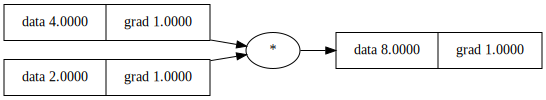

In [19]:
draw_dot(result)